<a href="https://colab.research.google.com/github/JubalJosh/Internship-Project-Ybi-Foundation/blob/Colab/Mileage%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd

In [66]:
import numpy as np

In [67]:
import matplotlib.pyplot as plt

In [68]:
import seaborn as sns

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [70]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [43]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [44]:
df.corr()

<ipython-input-44-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [45]:
df = df.dropna()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


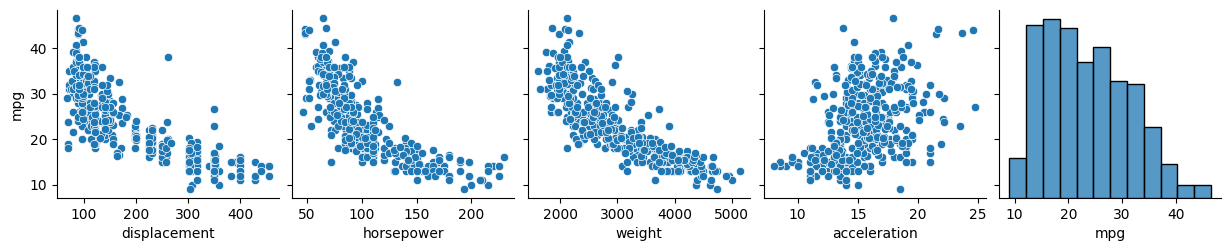

In [47]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')


<Axes: xlabel='displacement', ylabel='mpg'>

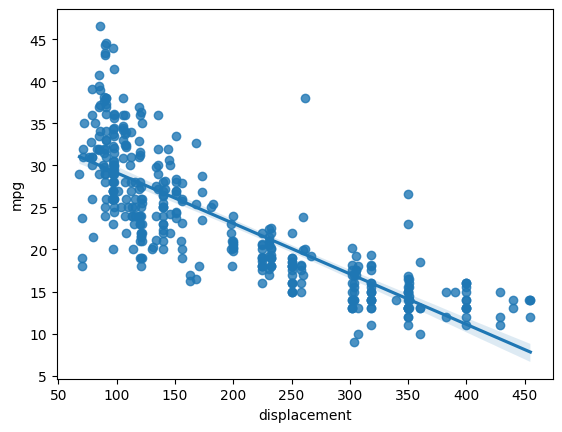

In [48]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)


In [49]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [50]:
y = df['mpg']

In [51]:
y.shape

(392,)

In [52]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]
x.shape

(392, 4)

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
LinearRegression()
lr.intercept_
23.372978332051797
lr.coef_

array([ 0.36051245, -1.85699184, -5.17267047,  0.07014755])

In [55]:
y_pred = lr.predict(xtest)
y_pred

array([29.20914983, 21.82142356, 19.10377909, 29.05876115, 24.38631069,
       29.77931643, 24.11801816, 27.07948384, 29.05974015, 30.13806251,
       23.61222687, 22.89068654, 26.68985624, 31.19936979, 23.70337123,
       24.32301165, 26.61289436, 22.41191609, 29.79765033, 23.78815695,
       11.69781449, 12.34962996, 28.99999999, 22.70587185, 29.39717177,
       31.84655735, 16.7096174 , 27.40920781, 29.36848784, 12.10406938,
       26.76351333, 15.84494438, 28.5040015 , 24.74879837, 27.89202392,
       12.93390359, 19.19793929, 23.1904269 , 30.90875119, 15.34198138,
       21.59734523, 29.1622097 , 32.94986247, 14.08313152, 17.40358178,
       12.71621014, 29.06233636, 25.15271425,  6.48998476, 19.56369585,
       26.02797788, 31.63625969, 31.11027701, 32.43534491, 27.2050641 ,
       21.4909155 , 16.46305646, 22.20054063, 12.1922509 , 17.83647068,
       19.41717514, 19.21404215, 28.55941377, 26.5119327 , 15.08363797,
       26.93643157, 10.6810167 , 27.59172804, 30.96162775, 29.60

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
mean_absolute_error(ytest, y_pred)
3.288673571240665
mean_absolute_percentage_error(ytest, y_pred)
0.144041599920641
r2_score(ytest, y_pred)

0.6782518069917185

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
x_train2 = poly.fit_transform(xtrain)
x_test2 = poly.fit_transform(xtest)
lr.fit(x_train2, ytrain)

In [58]:
lr.intercept_

21.635762772753996

In [59]:
lr.coef_

array([-1.32778007, -5.66460908, -1.97162353, -1.00590263,  1.53276475,
       -0.36195292,  0.27973193,  0.96485943, -0.42046135,  0.31977477])

In [61]:
y_pred_poly = lr.predict(x_test2)

In [62]:
mean_absolute_error(ytest, y_pred_poly)

2.868780193680577

In [63]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.12183073018557006

In [64]:
r2_score(ytest, y_pred_poly)

0.7493936871717388